# Mini Project 1
**The Erdös Institute**

**GOAL** Use current stock data to create two potentially profitable investment portfolios. One that is higher risk and one that is lower risk.

I include my interpretation and explanation of a high risk profile and low risk profile of a portfolio. I provide some measurable quantitative data in your explanation.

# Compare Risk of two Portfolios:
A stock has higher risk if it is more volatile. Mathematically, it is given by the standard deviation of the portfolio. 
## I choose the following 6 stocks and create 2 portfolios below.
CNDT = Conduent Inc.\
FDP = Fresh Del Monte\
CCS = Centuries Community Inc.\
DOLE = Dole PLC\
QUBT = Qunatum Computing Inc.\
NVDA = NVIDIA Corporations

Portfolio 1 consists of CNDT, FDP, CCS, DOLE. These 4 Small cap stocks, with highest EBITDA from the list, are recommended by NASDAQ. See source here: https://www.nasdaq.com/stocks/investing-lists/small-cap-value-stocks

Portfolio 2 consists of 2 stocks from the Quantum Computing sector. I chose the sector since this is a promising sector.

## Time range used to compare the stocks: 5 years
During Last 5 years, major events occured in World History: Covid-19, Many International conflicts started: Russia-Ukraine, Israel-Gaza


# Low Risk Portfolio:


# Naive Portfolio with zero knowledge of the stock market:



In [233]:
#Import Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize
import datetime as dt
#sns.set_style('darkgrid')
import yfinance as yf

In [ ]:
#load data for stocks above

tickers = ['CCS', 'CNDT', 'DOLE', 'FDP', 'NVDA', 'QUBT']
#portfolio_1 = ['CCS', 'CNDT', 'DOLE', 'FDP']
#portfolio_2 = ['NVDA', 'QUBT']

start_date = dt.datetime.today()-dt.timedelta(days = 1260)
end_date = dt.datetime.today()

stock = yf.download(tickers, start = start_date, end = end_date)

#stock_2 = yf.download(portfolio_2, start = start_date, end = end_date)

C:\Users\anshu\AppData\Local\Temp\ipykernel_26596\1295497257.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(tickers, start = start_date, end = end_date)
[*********************100%***********************]  6 of 6 completed


In [235]:
stock.head()

Price           Close                                                    High  \
Ticker            CCS  CNDT       DOLE        FDP       NVDA  QUBT        CCS   
Date                                                                            
2022-01-20  62.220848  5.12  11.950011  25.182045  24.106010  2.72  64.665918   
2022-01-21  61.640503  5.02  12.023326  25.244972  23.331425  2.44  63.676475   
2022-01-24  63.391056  5.08  11.830879  25.316900  23.329430  2.40  63.666960   
2022-01-25  62.287457  4.85  12.096639  25.011227  22.283335  2.42  63.590855   
2022-01-26  59.518909  4.78  12.133294  24.705555  22.730518  2.39  64.665925   

Price                                   ...       Open                        \
Ticker      CNDT       DOLE        FDP  ...       DOLE        FDP       NVDA   
Date                                    ...                                    
2022-01-20  5.34  12.215771  25.838342  ...  11.711744  25.703487  25.257910   
2022-01-21  5.18  12.280838  25.955213  ...  12.004998  25.262953  23.464182   
2022-01-24  5.10  12.096639  25.496708  ...  11.968342  25.128103  22.289328   
2022-01-25  5.04  12.188280  25.110121  ...  11.803387  25.065168  22.504930   
2022-01-26  5.05  12.362397  25.415796  ...  12.334905  24.696564  23.197666   

Price             Volume                                              
Ticker      QUBT     CCS     CNDT    DOLE     FDP       NVDA    QUBT  
Date                                                                  
2022-01-20  2.79  540400  2241300  788300   74300  435181000  319200  
2022-01-21  2.75  499100  2005500  279600  136700  718958000  350800  
2022-01-24  2.28  508800  2478200  522900  129600  913982000  576800  
2022-01-25  2.35  356500  2041900  660400  113000  664616000  173400  
2022-01-26  2.50  521200  1757700  441400  110500  755959000  266600  

[5 rows x 30 columns]

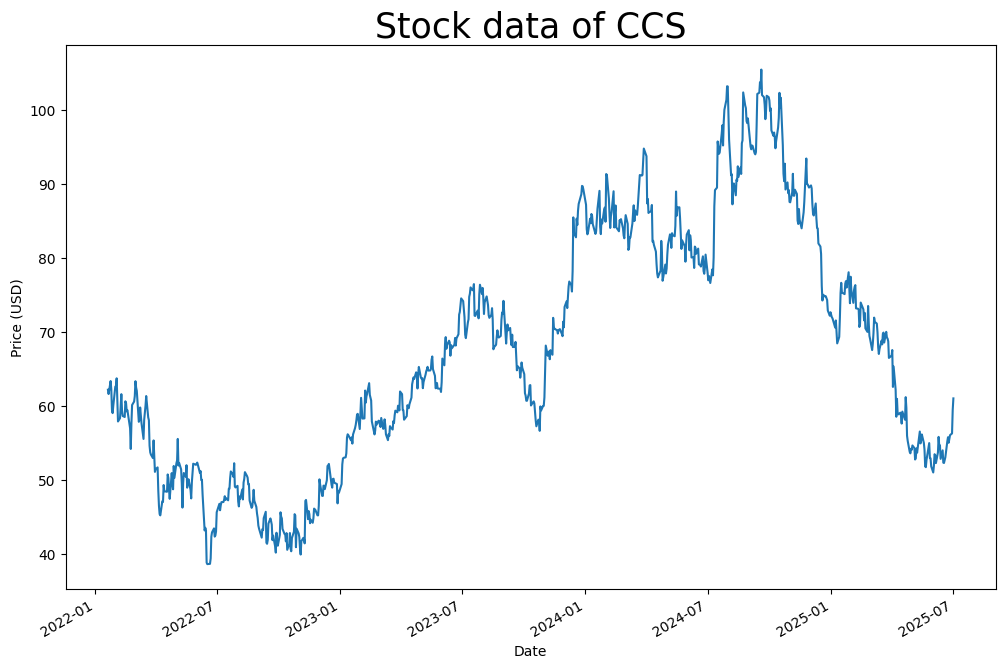

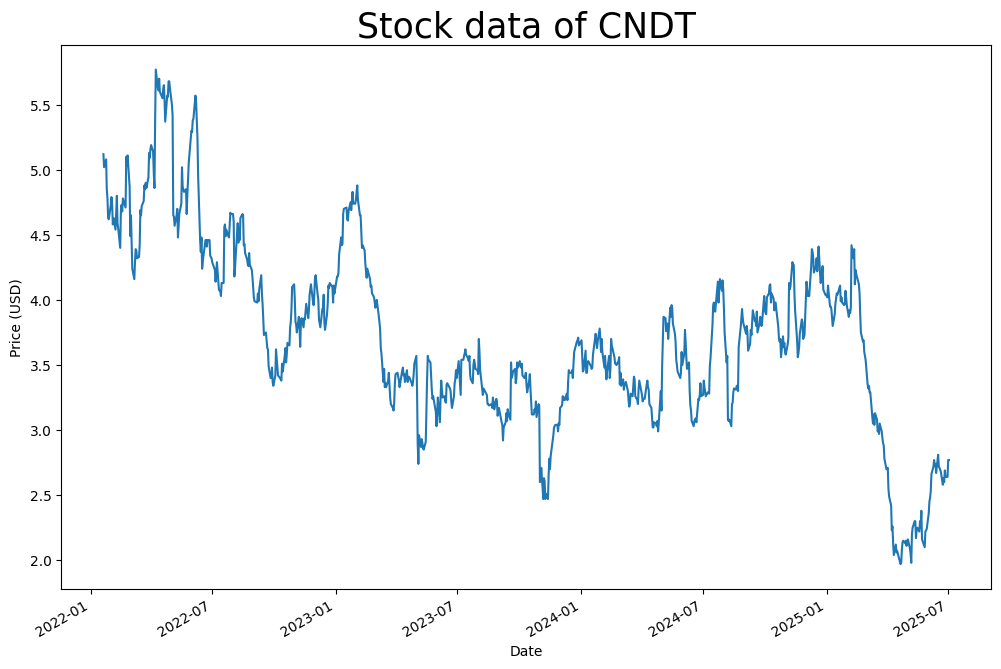

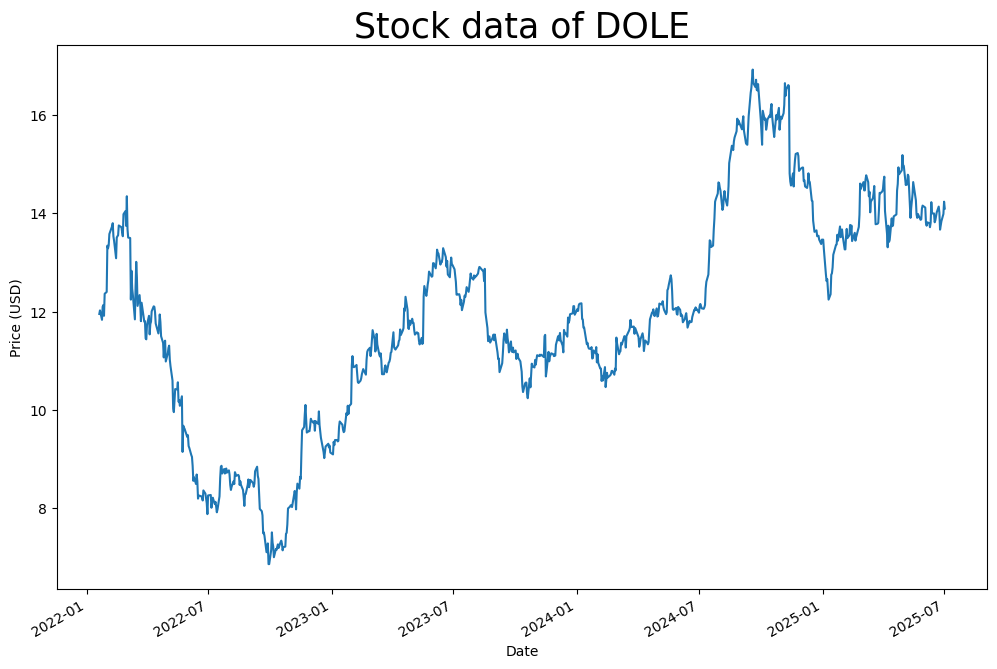

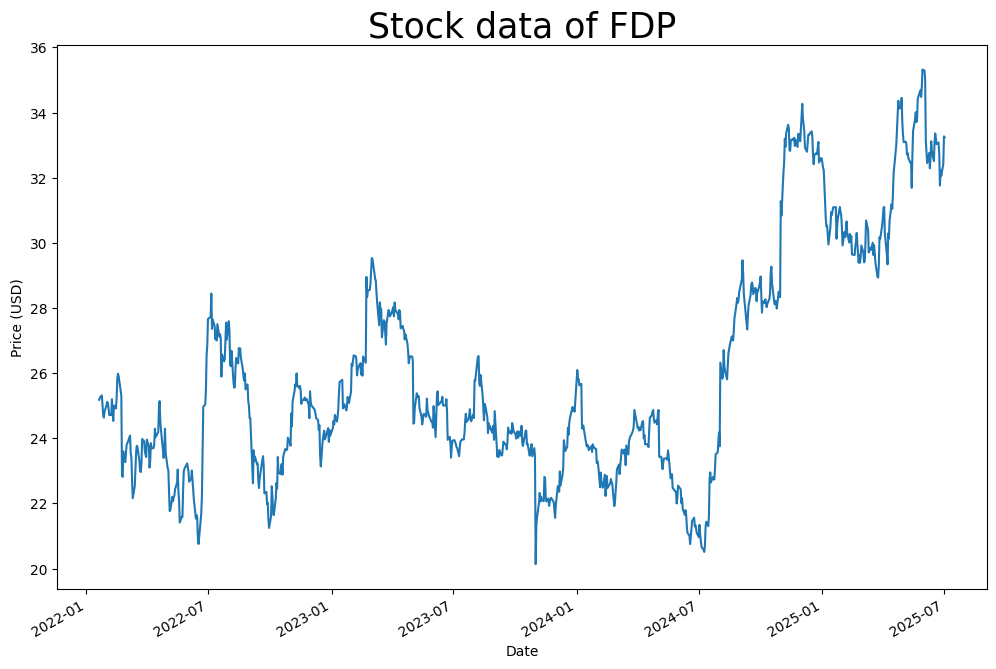

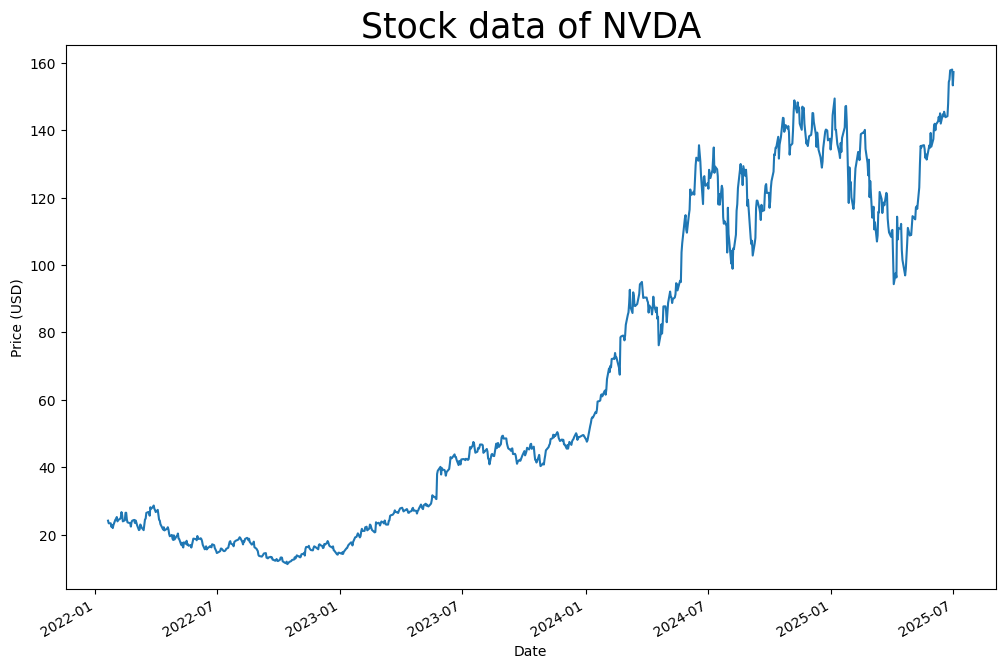

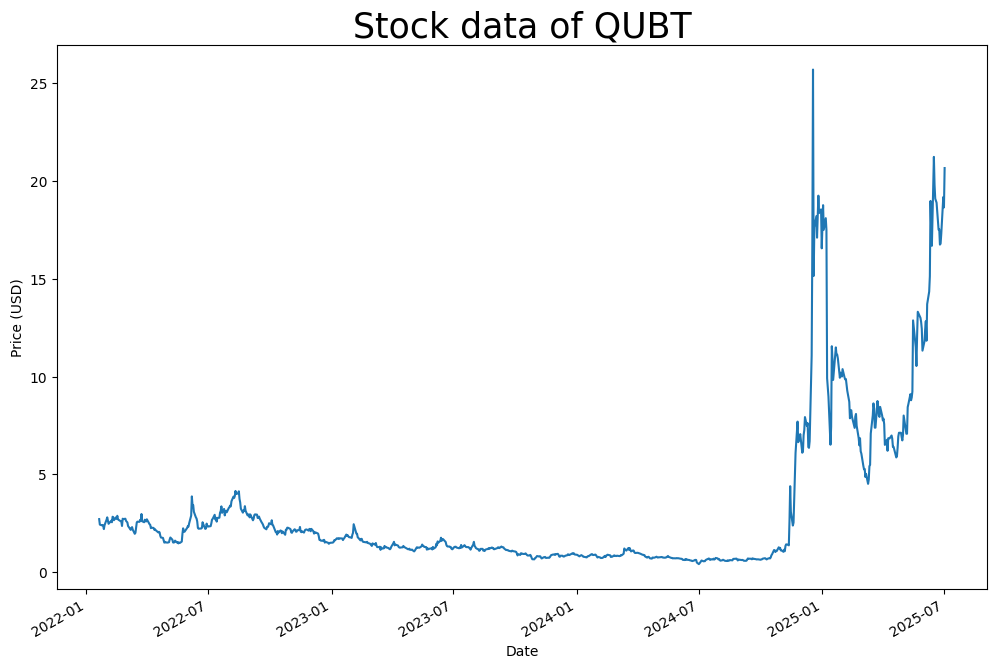

In [236]:
#Plot Closing Price of Portfolio 1 stock data
ticker = 'CCS'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

ticker = 'CNDT'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

ticker = 'DOLE'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

ticker = 'FDP'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

# Plotting the data for portfolio 2
ticker = 'NVDA'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()

ticker = 'QUBT'
stock['Close'][ticker].plot(figsize = (12,8))
plt.title(f'Stock data of {ticker}', size = 25)
plt.ylabel('Price (USD)')
plt.show()



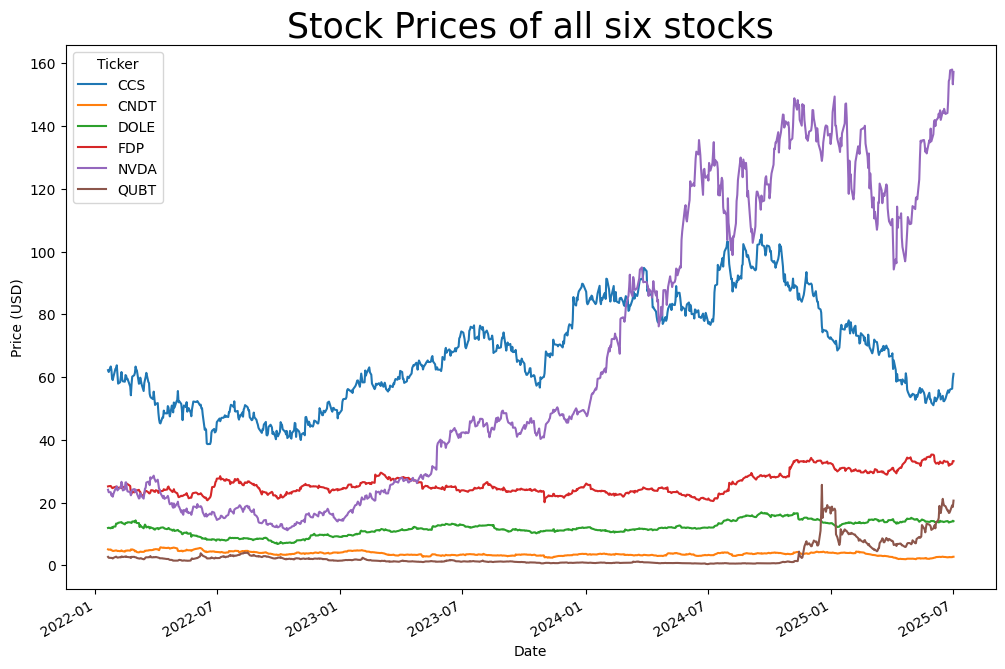

In [237]:
#Plot stock prices together of all 6 stocks
close = stock['Close']
stock['Close'].plot(figsize = (12,8))
plt.title(f'Stock Prices of all six stocks', size = 25)
plt.ylabel('Price (USD)')
plt.show()

In [239]:
#Add in column to stock data that is cumulative returns of all 6 stocks above

# Step 1: Compute cumulative return from 'Close' prices
close = stock['Close']
normalized_returns = close/close.iloc[0]-1 #Moves stock prices to a start of 0


# Step 2: Create MultiIndex columns for new data
normalized_returns.columns = pd.MultiIndex.from_product([['Cumulative Return'], normalized_returns.columns])

# Step 3: Concatenate to the original DataFrame
stock = pd.concat([stock, normalized_returns], axis =1 )

In [241]:
stock.head()

Close                                                    High  \
Ticker            CCS  CNDT       DOLE        FDP       NVDA  QUBT        CCS   
Date                                                                            
2022-01-20  62.220848  5.12  11.950011  25.182045  24.106010  2.72  64.665918   
2022-01-21  61.640503  5.02  12.023326  25.244972  23.331425  2.44  63.676475   
2022-01-24  63.391056  5.08  11.830879  25.316900  23.329430  2.40  63.666960   
2022-01-25  62.287457  4.85  12.096639  25.011227  22.283335  2.42  63.590855   
2022-01-26  59.518909  4.78  12.133294  24.705555  22.730518  2.39  64.665925   

                                        ...  Volume                     \
Ticker      CNDT       DOLE        FDP  ...    DOLE     FDP       NVDA   
Date                                    ...                              
2022-01-20  5.34  12.215771  25.838342  ...  788300   74300  435181000   
2022-01-21  5.18  12.280838  25.955213  ...  279600  136700  718958000   
2022-01-24  5.10  12.096639  25.496708  ...  522900  129600  913982000   
2022-01-25  5.04  12.188280  25.110121  ...  660400  113000  664616000   
2022-01-26  5.05  12.362397  25.415796  ...  441400  110500  755959000   

                   Cumulative Return                                          \
Ticker        QUBT               CCS      CNDT      DOLE       FDP      NVDA   
Date                                                                           
2022-01-20  319200          0.000000  0.000000  0.000000  0.000000  0.000000   
2022-01-21  350800         -0.009327 -0.019531  0.006135  0.002499 -0.032132   
2022-01-24  576800          0.018807 -0.007812 -0.009969  0.005355 -0.032215   
2022-01-25  173400          0.001071 -0.052734  0.012270 -0.006783 -0.075611   
2022-01-26  266600         -0.043425 -0.066406  0.015337 -0.018922 -0.057060   

                      
Ticker          QUBT  
Date                  
2022-01-20  0.000000  
2022-01-21 -0.102941  
2022-01-24 -0.117647  
2022-01-25 -0.110294  
2022-01-26 -0.121324  

[5 rows x 36 columns]

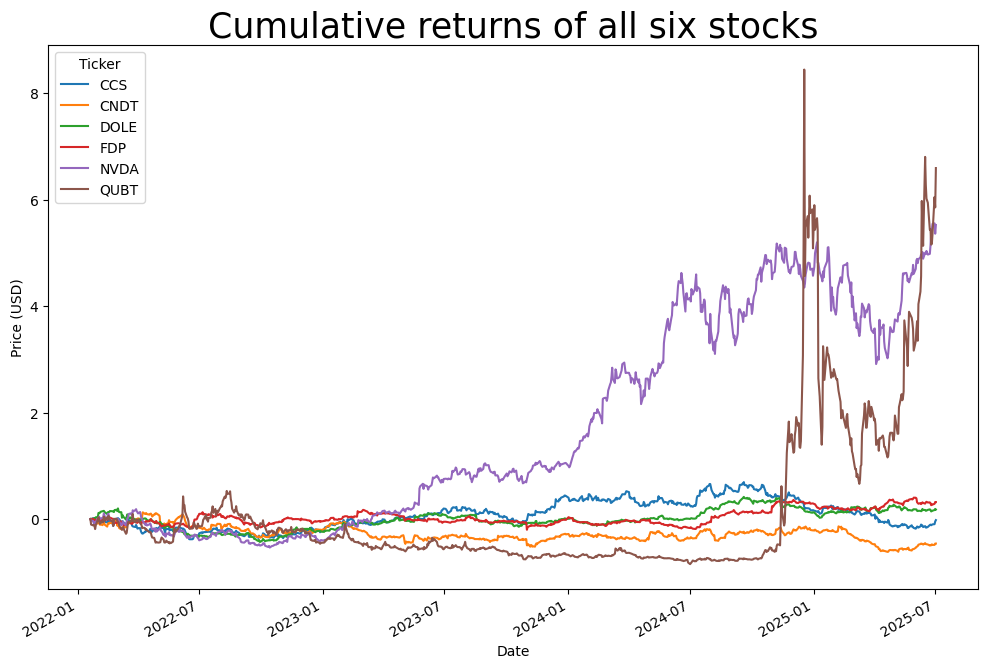

In [243]:
#Plot Cumlative Returns together
stock['Cumulative Return'].plot(figsize = (12,8))
plt.title(f'Cumulative returns of all six stocks', size = 25)
plt.ylabel('Price (USD)')
plt.show()

### We compute volatility of the each stock now.

In [260]:
CCS_close = stock['Close']['CCS']
CCS_daily_log_returns = CCS_daily_log_returns.dropna()
CCS_daily_log_returns

Date
2025-01-07   -0.064186
2025-01-08   -0.000214
2025-01-13   -0.019916
2025-01-14   -0.011095
2025-01-15    0.033436
                ...   
2025-06-26    0.004591
2025-06-27    0.017457
2025-06-30    0.001520
2025-07-01   -0.030135
2025-07-02    0.025440
Name: NVDA, Length: 117, dtype: float64

In [261]:
CNDT_close = stock['Close']['CNDT']
CNDT_daily_log_returns = np.log(stock['Close']['CNDT']/stock['Close']['CNDT'].shift(1))
CNDT_daily_log_returns = CNDT_daily_log_returns.dropna()
CNDT_daily_log_returns

Date
2022-01-21   -0.019724
2022-01-24    0.011881
2022-01-25   -0.046333
2022-01-26   -0.014538
2022-01-27   -0.031884
                ...   
2025-06-26    0.034030
2025-06-27   -0.018762
2025-06-30    0.000000
2025-07-01    0.048068
2025-07-02    0.000000
Name: CNDT, Length: 864, dtype: float64

In [262]:
DOLE_close = stock['Close']['DOLE']
DOLE_daily_log_returns = np.log(stock['Close']['DOLE']/stock['Close']['DOLE'].shift(1))
DOLE_daily_log_returns = DOLE_daily_log_returns.dropna()
DOLE_daily_log_returns

Date
2022-01-21    0.006116
2022-01-24   -0.016136
2022-01-25    0.022215
2022-01-26    0.003026
2022-01-27   -0.018293
                ...   
2025-06-26    0.005835
2025-06-27    0.006524
2025-06-30    0.010780
2025-07-01    0.017712
2025-07-02   -0.009880
Name: DOLE, Length: 864, dtype: float64

In [268]:
FDP_close = stock['Close']['FDP']
FDP_daily_log_returns = np.log(stock['Close']['FDP']/stock['Close']['FDP'].shift(1))
FDP_daily_log_returns = FDP_daily_log_returns.dropna()
FDP_daily_log_returns

Date
2022-01-21    0.002496
2022-01-24    0.002845
2022-01-25   -0.012147
2022-01-26   -0.012297
2022-01-27   -0.002916
                ...   
2025-06-26    0.014690
2025-06-27   -0.005288
2025-06-30    0.011166
2025-07-01    0.025881
2025-07-02   -0.000902
Name: FDP, Length: 864, dtype: float64

In [269]:
NVDA_close = stock['Close']['NVDA']
NVDA_daily_log_returns = np.log(stock['Close']['NVDA']/stock['Close']['NVDA'].shift(1))
NVDA_daily_log_returns = NVDA_daily_log_returns.dropna()
NVDA_daily_log_returns


Date
2022-01-21   -0.032660
2022-01-24   -0.000086
2022-01-25   -0.045877
2022-01-26    0.019869
2022-01-27   -0.037038
                ...   
2025-06-26    0.004591
2025-06-27    0.017457
2025-06-30    0.001520
2025-07-01   -0.030135
2025-07-02    0.025440
Name: NVDA, Length: 864, dtype: float64

In [270]:
QUBT_close = stock['Close']['QUBT']
QUBT_daily_log_returns = np.log(stock['Close']['QUBT']/stock['Close']['QUBT'].shift(1))
QUBT_daily_log_returns = QUBT_daily_log_returns.dropna()
QUBT_daily_log_returns


Date
2022-01-21   -0.108634
2022-01-24   -0.016529
2022-01-25    0.008299
2022-01-26   -0.012474
2022-01-27   -0.078301
                ...   
2025-06-26    0.002982
2025-06-27    0.029345
2025-06-30    0.103218
2025-07-01   -0.028037
2025-07-02    0.102406
Name: QUBT, Length: 864, dtype: float64

In [266]:
print(f'Volatility of Centuries Community Inc. is then {np.std(CCS_daily_log_returns)*np.sqrt(252)}')
print(f'Volatility of Conduent Inc. is then {np.std(CNDT_daily_log_returns)*np.sqrt(252)}')
print(f'Volatility of Dole PLC is then {np.std(DOLE_daily_log_returns)*np.sqrt(252)}')
print(f'Volatility of Fresh Del Monte is then {np.std(FDP_daily_log_returns)*np.sqrt(252)}')
print(f'Volatility of NVIDIA is then {np.std(NVDA_daily_log_returns)*np.sqrt(252)}')
print(f'Volatility of QUANTUM COMPUTING INC. is then {np.std(QUBT_daily_log_returns)*np.sqrt(252)}')

Volatility of Centuries Community Inc. is then 0.6348726167027107
Volatility of Conduent Inc. is then 0.4936091365628875
Volatility of Dole PLC is then 0.29834403549449745
Volatility of Fresh Del Monte is then 0.2819130796183399
Volatility of NVIDIA is then 0.5585661621697244
Volatility of QUANTUM COMPUTING INC. is then 1.338610688907928


# Cumulative plots and Portfolio value comparisons

## Values and calculating weights for Portfolio 1

In [308]:
#Create a dataframe of daily returns
#It is quite common to take the logs of daily returns to lessen computational complexity in standard deviation
portfolio_1 = ['CCS', 'CNDT', 'DOLE', 'FDP']
stock_1 = yf.download(portfolio_1, start = start_date, end = end_date)
daily_returns = np.log(stock_1['Close']/stock_1['Close'].shift(1))
daily_returns = daily_returns.dropna()

#Create a dictionary of standard deviations of daily return
#Normalize the standard deviation for yearly by multiplying by sqrt(#trading days in year ~ 252)
annualized_volatility = {ticker: np.std(daily_returns[ticker])*np.sqrt(252) for ticker in portfolio_1}
annualized_volatility

C:\Users\anshu\AppData\Local\Temp\ipykernel_26596\4226570189.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_1 = yf.download(portfolio_1, start = start_date, end = end_date)
[*********************100%***********************]  4 of 4 completed


{'CCS': np.float64(0.41950818093543357),
 'CNDT': np.float64(0.4936091365628875),
 'DOLE': np.float64(0.2983440468491741),
 'FDP': np.float64(0.28191303028336634)}

In [309]:
for ticker in portfolio_1:
    covariance_matrix_1 = 252*((daily_returns).cov()) 
    covariance_matrix_1

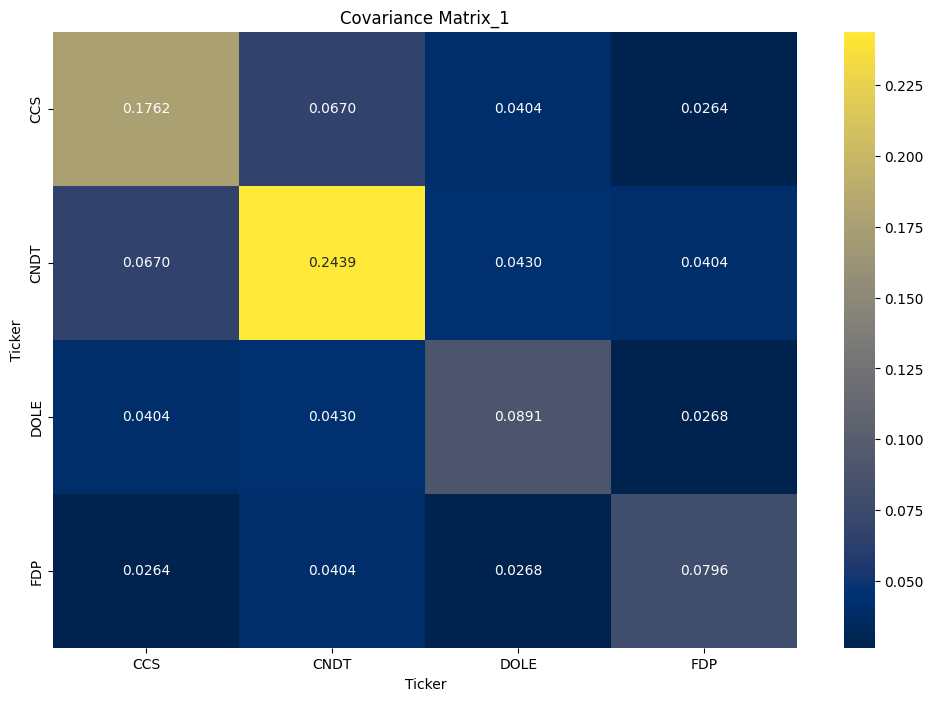

In [305]:
# Create a heatmap to visualize the covariance matrix
plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix_1, annot=True, cmap='cividis', fmt ='.4f')
plt.title('Covariance Matrix_1')
plt.show()

In [ ]:
#Find a set of weights, equivalently portfolio investment percentages in stock_symbols, 
#which minimizes a historical portfolio's volatility subject to the following investment constraints
#1) Must invest at least 10% of capital into each index
#2) Cannot invest more than 70% of capital into a single index

#Create dictionary average/expected daily return for indexes in stock_symbols normalized for yearly return
#expected_returns = {stock: 252*np.mean(returns[stock]) for stock in stock_symbols}

# Number of assets
n_assets_1 = len(portfolio_1)

# Define an initial guess for asset weights (e.g., equal weights)
initial_weights_1 = np.array([1/n_assets_1] * n_assets_1)

# Define weight constraints
#Sum of weights equals 1 
#Allocate at least 3% of capital into each index in stock_symbols
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
               {'type': 'ineq', 'fun': lambda weights: min(weights)-.1},
              {'type': 'ineq', 'fun': lambda weights: .70-max(weights)})

# Define the objective function to minimize portfolio variance
def portfolio_volatility(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix_1, weights)))
    return portfolio_std_dev

# Run the optimization to find the optimal weights
result_1 = minimize(portfolio_volatility, initial_weights_1, constraints=constraints)

# Optimal asset weights
optimal_weights_1 = result_1.x

# Print the optimal weights and expected returns
print("Optimal Asset Weights to minimize volatility:")
for ticker, weight in zip(portfolio_1, optimal_weights_1):
    print(f"{ticker}: Weight = {weight:.4f}")

Optimal Asset Weights to minimize volatility:
CCS: Weight = 0.1081
CNDT: Weight = 0.1000
DOLE: Weight = 0.3477
FDP: Weight = 0.4443


# Portfolio 2

In [318]:
#Create a dataframe of daily returns
#It is quite common to take the logs of daily returns to lessen computational complexity in standard deviation
portfolio_2 = ['NVDA', 'QUBT']
stock_2 = yf.download(portfolio_2, start = start_date, end = end_date)
daily_returns = np.log(stock_2['Close']/stock_2['Close'].shift(1))
daily_returns = daily_returns.dropna()

#Create a dictionary of standard deviations of daily return
#Normalize the standard deviation for yearly by multiplying by sqrt(#trading days in year ~ 252)
annualized_volatility = {ticker: np.std(daily_returns[ticker])*np.sqrt(252) for ticker in portfolio_2}
annualized_volatility

C:\Users\anshu\AppData\Local\Temp\ipykernel_26596\3704757276.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_2 = yf.download(portfolio_2, start = start_date, end = end_date)
[*********************100%***********************]  2 of 2 completed


{'NVDA': np.float64(0.5585661672939509), 'QUBT': np.float64(1.338610688907928)}

In [320]:
for ticker in portfolio_2:
    covariance_matrix_2 = 252*((daily_returns).cov()) 
    covariance_matrix_2

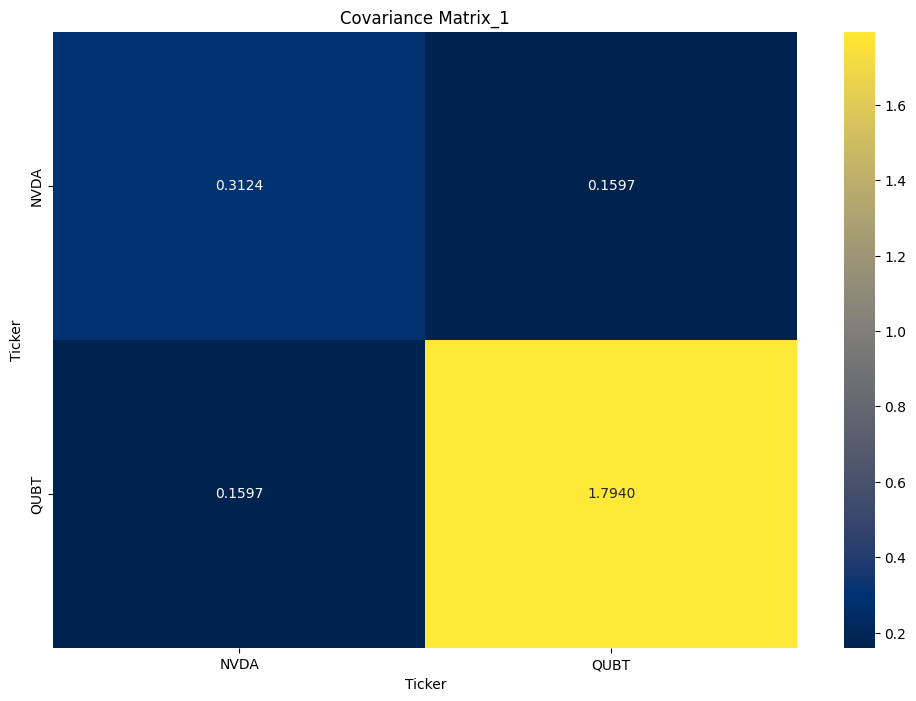

In [321]:
# Create a heatmap to visualize the covariance matrix
plt.figure(figsize = (12,8))
sns.heatmap(covariance_matrix_2, annot=True, cmap='cividis', fmt ='.4f')
plt.title('Covariance Matrix_1')
plt.show()

In [327]:
#Find a set of weights, equivalently portfolio investment percentages in stock_symbols, 
#which minimizes a historical portfolio's volatility subject to the following investment constraints
#1) Must invest at least 10% of capital into each index
#2) Cannot invest more than 70% of capital into a single index

#Create dictionary average/expected daily return for indexes in stock_symbols normalized for yearly return
#expected_returns = {stock: 252*np.mean(returns[stock]) for stock in stock_symbols}
# Number of assets
n_assets_2 = len(portfolio_2)

# Define an initial guess for asset weights (e.g., equal weights)
initial_weights_2 = np.array([1/n_assets_2] * n_assets_2)

# Define weight constraints
#Sum of weights equals 1 
#Allocate at least 3% of capital into each index in stock_symbols
constraints = ({'type': 'eq', 'fun': lambda weights: np.sum(weights)-1},
               {'type': 'ineq', 'fun': lambda weights: min(weights)-.1},
              {'type': 'ineq', 'fun': lambda weights: .60-max(weights)})

# Define the objective function to minimize portfolio variance
def portfolio_volatility(weights):
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix_2, weights)))
    return portfolio_std_dev

# Run the optimization to find the optimal weights
result_2 = minimize(portfolio_volatility, initial_weights_2, constraints=constraints)

# Optimal asset weights
optimal_weights_2 = result_2.x

# Print the optimal weights and expected returns
print("Optimal Asset Weights to minimize volatility:")
for ticker, weight in zip(portfolio_2, optimal_weights_2):
    print(f"{ticker}: Weight = {weight:.4f}")

Optimal Asset Weights to minimize volatility:
NVDA: Weight = 0.6000
QUBT: Weight = 0.4000


In [330]:
print(f'The optimal volatility of Portfolio 1 subject to the constraints is {result_1.fun}')
print(f'The optimal volatility of Portfolio 1 subject to the constraints is {result_2.fun}')

The optimal volatility of Portfolio 1 subject to the constraints is 0.22987573149715876
The optimal volatility of Portfolio 1 subject to the constraints is 0.6900138168289683


# Hence, based on above data Portfolio 2 is more volatile than portfolio 1. 
